## Modèle GARCH

In [ ]:
!pip install arch
!wget -q https://raw.githubusercontent.com/Undeavor/PE28/main/CREDITAGRICOLESA_2025-10-05.txt -O CA.txt

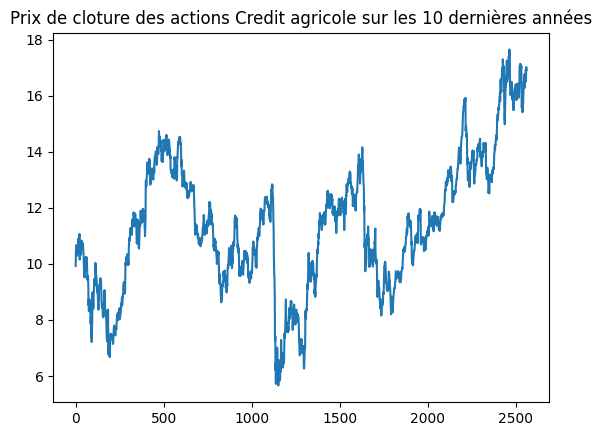

In [ ]:
from arch import arch_model
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
from pylab import rcParams

df = pd.read_csv("/content/CA.txt", sep="\t",usecols=["date", "ouv", "haut", "bas", "clot", "vol", "devise"], parse_dates=["date"])

#print(df.head())
plt.plot(df.clot)
plt.title('Prix de cloture des actions Credit agricole sur les 10 dernières années')
plt.show()

Ici pas de dividendes ( pas dispos sur boursorama )

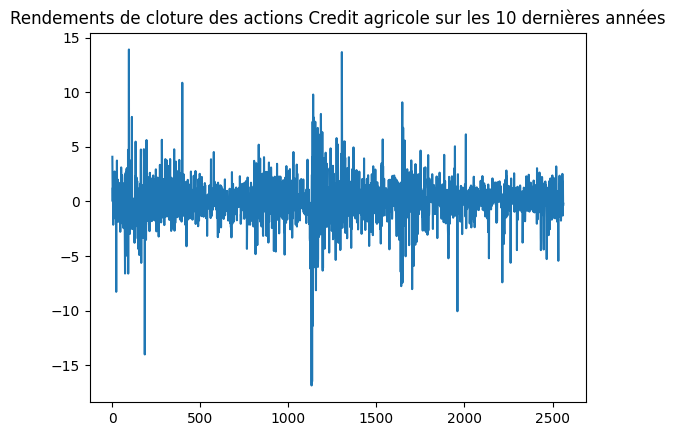

In [ ]:
# Calculate daily returns as percentage price changes
df['Return'] = 100 * (df['clot'].pct_change())

#print(df['Return'].head())
#print(df['Return'].tail(50))
#plt.plot(df.Return)[-50:])
plt.plot(df.Return)
plt.title('Rendements de cloture des actions Credit agricole sur les 10 dernières années')
plt.show()

In [ ]:
#Choix 1:
returns = df.Return

#Choix 2:
#returns = df.Return[:1350] #changement de point de référence : ici des données localement beaucoup plus volatiles

returns = returns.replace([np.inf, -np.inf], np.nan)
returns = returns.dropna()

In [ ]:
am = arch_model(returns, mean='zero', vol='Garch', p=1, q=1, dist = 'normal') #on prend une loi de student
res = am.fit(disp='off')
print(res.summary())


                       Zero Mean - GARCH Model Results                        
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4957.64
Distribution:                  Normal   AIC:                           9921.28
Method:            Maximum Likelihood   BIC:                           9938.82
                                        No. Observations:                 2561
Date:                Sun, Oct 26 2025   Df Residuals:                     2561
Time:                        12:26:29   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0889  4.029e-02      2.205  2.744e-02 [9.881e-0

In [ ]:
# Make 5-period ahead forecast
forecast = res.forecast(horizon = 5)

print(forecast.variance[-1:])

           h.1       h.2       h.3       h.4       h.5
2561  2.082907  2.117684  2.151558  2.184553  2.216692


1     1.952633
2     2.181274
3     2.163393
4     2.073666
5     2.018570
6     1.952645
7     1.964426
8     1.895077
9     1.823270
10    1.786853
Name: cond_vol, dtype: float64


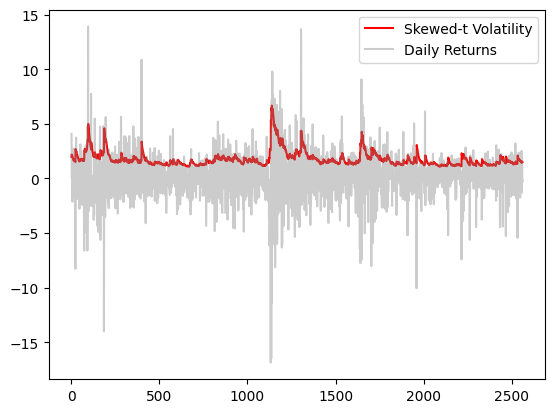

In [ ]:
# On compare avec la vraie courbe
vol = res.conditional_volatility
print (vol[:10])
plt.plot(vol, color = 'red', label = 'Skewed-t Volatility')
plt.plot(df['Return'], color = 'grey',
         label = 'Daily Returns', alpha = 0.4)
plt.legend(loc = 'upper right')
plt.show()

/tmp/ipython-input-1418983068.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=50, color='r')


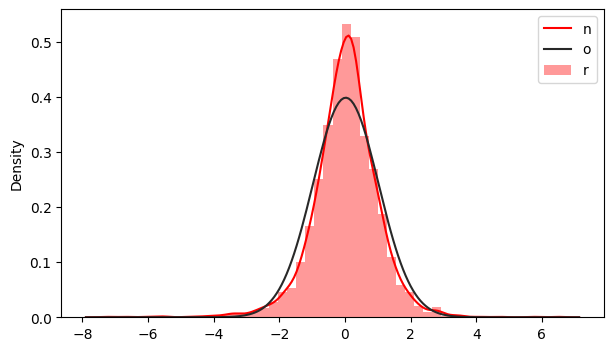

In [ ]:
#On regarde la distribution obtenue par le modèle GARCH
gm_resid = res.resid
gm_std = res.conditional_volatility

# on standardise
gm_std_resid = gm_resid /gm_std

# rouge = réalité
plt.figure(figsize=(7,4))
sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=50, color='r')
plt.legend('normal')
plt.show()

In [ ]:
#BIC/AIC
print(res.bic)
print(res.aic) #jsp si ca marche

NameError: name 'res' is not defined

In [ ]:
#Fenetre glissante

## Utilisation de Yfinance

In [ ]:
#!pip install yfinance #apparement déjà installé de base

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
#ex : AAPL
#intervalles possibles de temps : 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
#1m data is only retrievable for the last 7 days, and anything intraday (interval <1d) only for the last 60 days.
#de la data sur 7 jours, intervalles de 1m, fait environ 2000 valeurs ( sachant qu'on peut faire en sorte de prendr)

apple= yf.Ticker("aapl")

# show actions (dividends, splits)
apple.actions

# show dividends
apple.dividends

# show splits
apple.splits

ticker = yf.download("AAPL", period="7d", interval="1m")
print(ticker)


/tmp/ipython-input-3304036262.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker = yf.download("AAPL", period="7d", interval="1m")
[*********************100%***********************]  1 of 1 completed

Price                           Close        High         Low        Open  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Datetime                                                                    
2025-10-02 13:30:00+00:00  256.459991  256.829987  256.220093  256.589996   
2025-10-02 13:31:00+00:00  256.369995  256.850006  256.350006  256.480011   
2025-10-02 13:32:00+00:00  257.160004  257.299988  256.260010  256.355011   
2025-10-02 13:33:00+00:00  256.750000  257.239990  256.640015  257.140015   
2025-10-02 13:34:00+00:00  255.899994  257.049988  255.835999  256.737488   
...                               ...         ...         ...         ...   
2025-10-10 19:55:00+00:00  244.970001  245.300003  244.570007  245.240005   
2025-10-10 19:56:00+00:00  244.860001  245.059998  244.809998  244.970001   
2025-10-10 19:57:00+00:00  245.449997  245.459900  244.850006  244.860001   
2025-10-10 19:58:00+00:00  245.395004  245.570007  245.279999  245.440002   

## Google Finance
pas sûr que ce soit vraiment mieux que yfinance pour le moment ( ni même mieux que des données téléchargées sur internet )

In [ ]:
#!pip install googlefinance

# Fonction condensée utilisable

In [2]:
!pip install arch
import pandas as pd
import numpy as np
from arch import arch_model

def predict_volatility(filepath, horizon=5):
    """
    Entraîne un modèle GARCH(1,1) sur les rendements et renvoie
    la volatilité prédite pour un horizon donné.

    Paramètres :
        filepath : str  - chemin vers le fichier txt/csv
        horizon  : int  - nombre de périodes prédites (par défaut 5)

    Sortie :
        np.array des volatilités prédites pour chaque horizon
    """

    # Lecture du fichier
    df = pd.read_csv(
        filepath,
        sep="\t",
        usecols=["date", "ouv", "haut", "bas", "clot", "vol", "devise"],
        parse_dates=["date"]
    )

    # Calcul du rendement quotidien (%)
    df["Return"] = 100 * df["clot"].pct_change()

    # Nettoyage
    returns = df["Return"].replace([np.inf, -np.inf], np.nan).dropna()

    # Modèle GARCH(1,1)
    model = arch_model(returns, mean="zero", vol="Garch", p=1, q=1, dist="normal")
    res = model.fit(disp="off")

    # Prédiction
    forecast = res.forecast(horizon=horizon)

    # Variances → volatilité = racine(variance)
    predicted_vol = np.sqrt(forecast.variance.values[-1])

    return predicted_vol

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 18.2 MB/s eta 0:00:00
